# Student's Name: Yang Zhang

### KIND SUGGESTION: 
### PLEASE TAKE A LOOK AT MY AWESOME PLOT BEFORE YOU RUN THE CODE !

In [1]:
%matplotlib inline
import numpy as np
from random import choice
import matplotlib.pyplot as plt
# np.random.seed(1)  strange - the plotting is much better without random seed...

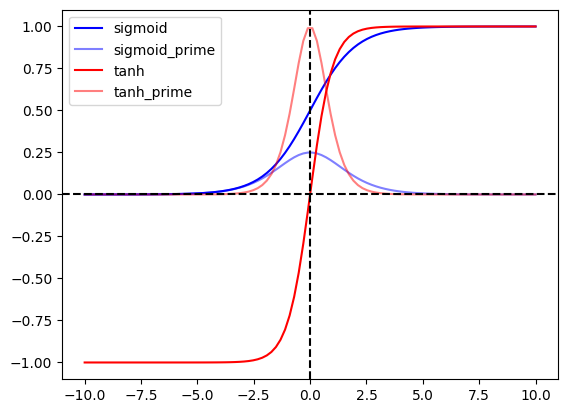

In [2]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    z = sigmoid(x)
    return z * (1.0 - z)

def tanh(x):
    sinh = np.array([(np.exp(x) - np.exp(-x))/2])
    cosh = np.array([(np.exp(x) + np.exp(-x))/2])
    return np.concatenate(sinh / cosh)

def tanh_prime(x):
    return 1-tanh(x)**2

t = np.linspace(-10,10,100)
  
plt.plot(t, sigmoid(t), label = 'sigmoid', color = 'blue')
plt.plot(t,sigmoid_prime(t), label = 'sigmoid_prime', color = 'blue', alpha = 0.5)
plt.plot(t, tanh(t), label = 'tanh', color = 'red')
plt.plot(t, tanh_prime(t), label = 'tanh_prime', color = 'red', alpha = 0.5)
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axvline(x = 0, color = 'black', linestyle = '--')
plt.legend()
plt.show()

steps = 0 
Training Results(data, prediction, expected): 
 [[array([0, 0]) 0.75754 0]
 [array([0, 1]) 0.39438 1]
 [array([1, 0]) 0.23315 1]
 [array([1, 1]) 0.09431 0]] 
RMS_err 0.620000136772867
steps = 2500 
Training Results(data, prediction, expected): 
 [[array([0, 0]) -0.00378 0]
 [array([0, 1]) 0.98917 1]
 [array([1, 0]) 0.98897 1]
 [array([1, 1]) 0.09467 0]] 
RMS_err 0.047999444567854224
steps = 5000 
Training Results(data, prediction, expected): 
 [[array([0, 0]) -0.00136 0]
 [array([0, 1]) 0.99562 1]
 [array([1, 0]) 0.99564 1]
 [array([1, 1]) -0.04284 0]] 
RMS_err 0.021651086414576873
steps = 7500 
Training Results(data, prediction, expected): 
 [[array([0, 0]) 0.01446 0]
 [array([0, 1]) 0.99746 1]
 [array([1, 0]) 0.99744 1]
 [array([1, 1]) -0.05234 0]] 
RMS_err 0.02720920054581459
steps = 10000 
Training Results(data, prediction, expected): 
 [[array([0, 0]) -0.04792 0]
 [array([0, 1]) 0.99807 1]
 [array([1, 0]) 0.99799 1]
 [array([1, 1]) -0.05337 0]] 
RMS_err 0.03588969602609

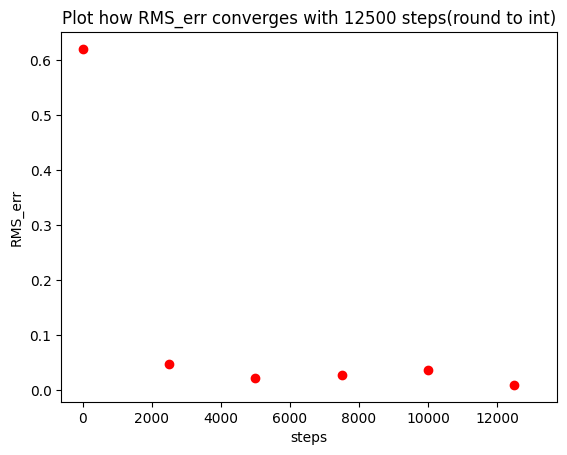

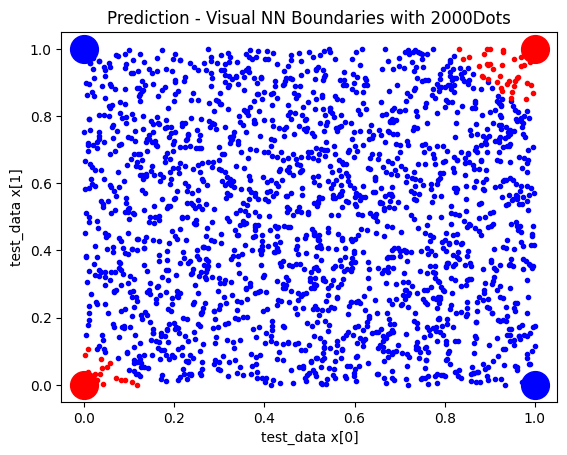

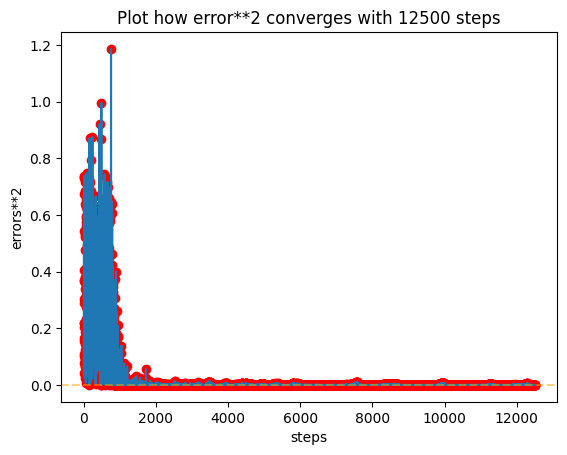

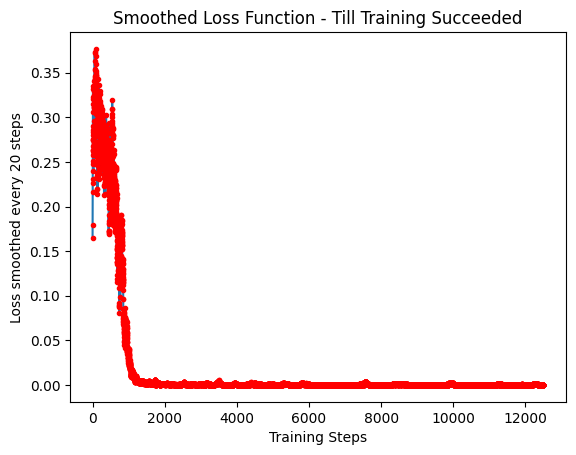

In [3]:
class NeuralNetwork:

    def __init__(self, layers, activation = tanh):
        self.layers = layers 
        if activation == sigmoid: #  if user specify 'sigmoid', activation is sigmoid, otherwise it is tanh - as default
            self.activation = sigmoid
            self.act_pr = sigmoid_prime
        else:
            self.activation = tanh
            self.act_pr = tanh_prime     
        
        if len(self.layers) <= 2:
            print('Need more layers! At least I tried!!!')
        else:
            self.w_0 = np.random.randn(self.layers[1], (self.layers[0]+1)) # ok, my shape is diff from prof's shape
            self.w = [self.w_0 for i in range(len(self.layers)-1)] # build a home for all the weights

            for i in range(1,len(self.layers)-1):  # update home of weights, keep them in the home called 'self.w'
                self.w[i] = np.random.randn(self.layers[i+1], self.layers[i]+1) # ok
                  
    def fit(self, X, y, learning_rate=0.2, steps = 20000, tol = 1e-2):
      
      if steps == 0:
          print('Need more steps!!!!!')
      alfa = learning_rate
      training_data = []
      errors = []
  
      # make X y together correspondingly
      for i in range(len(X)):
          training = np.append(X[i],y[i])
          training_data.append(training)

      for i in range(steps): #stepsstepsstepsstepsstepsstepsstepsstepsstepsstepsstepsstepsstepsstepsstepsstepsstepsstepsstepsstepstepssteps

          A = []    
          choice_data = choice(training_data)    
          x_train = np.append(choice_data[0:-1],1)  
          A.append(x_train)  # [array([1, 1, 1])]
        
          # print('-----------------------------------------------------------------------------------')
          yy = choice_data[-1] # corresponding target
          a = self.activation(np.dot(x_train, self.w[0].T)) # A1 = my input(add bias already) multiply inital weights
          A.append(a)
          for k in range(1,len(self.layers)-1): 
              a = self.activation(np.dot(np.append(a,1), self.w[k].T)) #a2, a3... 
              A.append(a)
    
          error = yy - A[-1]
          errors.append(error)
          error_list = np.concatenate(errors)
          # print(error)
          # print('A has all the outputs now including inputs fr the beginning', A)
    
          # back prop back prop back prop back prop back prop back prop back prop back prop back prop back prop back prop back prop back prop

          d = error*self.act_pr(A[-1])  # It should be g_pr(A)*np.dot(delta, weights) 
          d_layer =[]
          d_layer.append(d)

          for j in range(len(self.layers)-2,0,-1): #  backward so from big to small
              d = self.act_pr(A[j])* np.dot(d,self.w[j][:,:-1]) # drop weight of bias
              d_layer.append(d)

          d_layer.reverse() # this is allllll my deltas

        # now im doing forward del to get optimized weights forward del to get optimized weights forward del to get optimized weights oh oh oh
          for u in range(len(d_layer)):
              if u == 0:
                  deldel = np.dot(np.atleast_2d(d_layer[u]).T, np.atleast_2d(A[u])) # (delta*Ai)
                  self.w[u] += alfa* deldel 
              else:
                  deldeldel = np.dot(np.atleast_2d(d_layer[u]).T , np.atleast_2d(np.append(A[u], 1)))# (delta*[Ai,1])
                  self.w[u] += alfa* deldeldel   
              self.w # this is the optimized weight-set,  I'm updating the self.w. From next step, I will keep using my optimized weight-set, yah
            
          interval =  steps//20  # I like 20, let's cut the steps into 20 parts, round to int
          RMS = []
          
          if (i%interval) == 0:
              def find_RMS_error(self,X,y):
                XX = []
                err2 = [0]*len(X) # 4
                for b, xx in enumerate(X): # for [0,0]...
                    for o, w in enumerate(self.w): 
                        xx = self.activation(np.dot(np.atleast_2d(np.append(xx,1)),w.T)) # z for [0,0], [1,0]...
                    XX.append(xx[0]) # 4 outputs
                
                for e in range(len(X)):
                    err2[e] = (y[e] - XX[e])**2 # err^2 for [0,0], [1,0]...
                
                RMS = np.sqrt(np.sum(err2)/len(y)) # i sum the 4 err2
                return(RMS,XX)
 
              RMS_err, zs_X = find_RMS_error(self,X=X,y=y)
             
              pretty_format = [0]*len(X) # in order to print sth similar to prof's pretty format...

              for pf in range(len(X)):
                    pretty_format[pf] = X[pf],zs_X[pf][0].round(5),y[pf]
              so_pretty = np.asarray(pretty_format, dtype = object).reshape(len(X),3)

              print('steps =', i, '\nTraining Results(data, prediction, expected):', '\n',so_pretty,'\nRMS_err', RMS_err)
              plt.scatter(i, RMS_err, color = 'red')
              
              try:
                if RMS_err < tol:
                   print('NN training succeeded!!! !!!')
                   break
                else :
                  if (i) == (steps - interval) :
                    print('NN training failed... ...')  
                  else:
                     continue  
              except:
                  raise 
    
      plt.xlim(-0.05*i, i*1.1)
      plt.ylabel('RMS_err')
      plt.xlabel('steps')
      plt.title('Plot how RMS_err converges with ' + str(i) + ' steps' + '(round to int)')
      plt.show()

      def predict(self, pred_data): # use my best optimized weight to predict, similar codes to above.
        Z = []
        xxx = pred_data
        for j, pd in enumerate(pred_data):
          for i , wow in enumerate(self.w):
             pd = self.activation(np.dot(np.atleast_2d(np.append(pd,1)),wow.T))
          Z.append(pd)
        return(Z)

      def visual_NN_boundaries(self, Nsamp=2000): # this is similar to what we've learnt.
        test = np.random.rand(Nsamp,2)
        threshold = 0.5
        z = predict(self, pred_data = test)
    
        for s, test_data in enumerate(test):
           if z[s] > threshold:
            plt.plot(test_data[0], test_data[1], 'b.')
           else:
            plt.plot(test_data[0], test_data[1], 'r.')
  
        for i, x_x in enumerate(X):
            if y[i]:
                plt.plot(x_x[0], x_x[1], 'bo', ms = 20)
            else:
                plt.plot(x_x[0], x_x[1], 'ro', ms = 20)
        plt.title('Prediction - Visual NN Boundaries with ' + str(Nsamp) + 'Dots')
        plt.xlabel('test_data x[0]')
        plt.ylabel('test_data x[1]')
        plt.show()

      visual_NN_boundaries(self, Nsamp = 2000)

      return(self.w, steps, error_list)
  
    
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]]) 
y = np.array([0, 1, 1, 0]) 
best_w, steps, error_list = NeuralNetwork([2,2,1]).fit(X,y,steps = 50000)

# error**2error**2error**2error**2error**2error**2error**2error**2error**2error**2error**2error**2
plt.scatter(np.arange(len(error_list)), (error_list)**2, color = 'red')
plt.plot(np.arange(len(error_list)),(error_list)**2)
plt.axhline(y = 0, linestyle = '--', color = 'orange', alpha = 0.5)
plt.title('Plot how error**2 converges with ' + str(len(error_list)-1) + ' steps' )
plt.xlim(-len(error_list)*0.05,len(error_list)*1.05)
plt.ylabel('errors**2')
plt.xlabel('steps')
plt.show()

# losslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslossloss
loss = error_list ** 2
window_size = 20
loss_smooth = np.convolve(loss, np.ones((window_size,))/window_size, mode='same')
plt.figure()
plt.plot(loss_smooth)
plt.plot(loss_smooth, 'r.')
plt.ylabel('Loss smoothed every {:d} steps'.format(window_size))
plt.xlabel('Training Steps')
plt.title('Smoothed Loss Function - Till Training Succeeded')
plt.show()


steps = 0 
Training Results(data, prediction, expected): 
 [[array([0., 0.]) 0.86317 0]
 [array([0., 1.]) 0.86191 0]
 [array([0.5, 1. ]) 0.87412 0]
 [array([0. , 0.5]) 0.86228 1]
 [array([1., 0.]) 0.8858 1]
 [array([1., 1.]) 0.90296 1]] 
RMS_err 0.6182580281975576
steps = 1000 
Training Results(data, prediction, expected): 
 [[array([0., 0.]) 0.21169 0]
 [array([0., 1.]) 0.21587 0]
 [array([0.5, 1. ]) 0.11165 0]
 [array([0. , 0.5]) 0.20906 1]
 [array([1., 0.]) 0.95322 1]
 [array([1., 1.]) 0.87746 1]] 
RMS_err 0.3527665413021568
steps = 2000 
Training Results(data, prediction, expected): 
 [[array([0., 0.]) 0.22166 0]
 [array([0., 1.]) 0.41444 0]
 [array([0.5, 1. ]) 0.0941 0]
 [array([0. , 0.5]) 0.35111 1]
 [array([1., 0.]) 0.97966 1]
 [array([1., 1.]) 0.96708 1]] 
RMS_err 0.32972335670813585
steps = 3000 
Training Results(data, prediction, expected): 
 [[array([0., 0.]) 0.20522 0]
 [array([0., 1.]) 0.4422 0]
 [array([0.5, 1. ]) -0.11076 0]
 [array([0. , 0.5]) 0.39635 1]
 [array([1., 0.

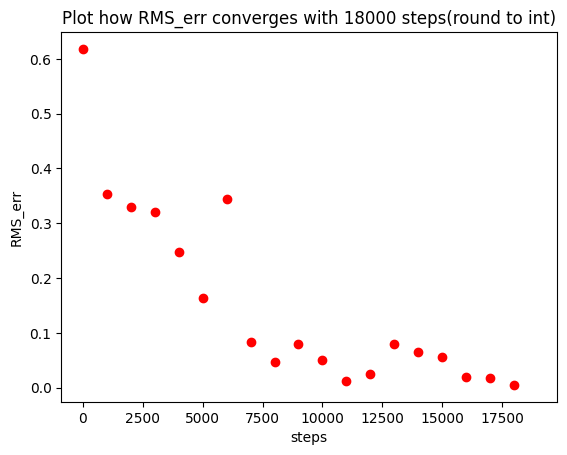

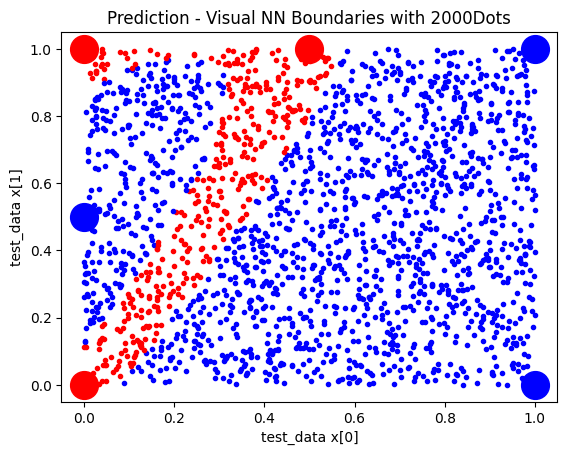

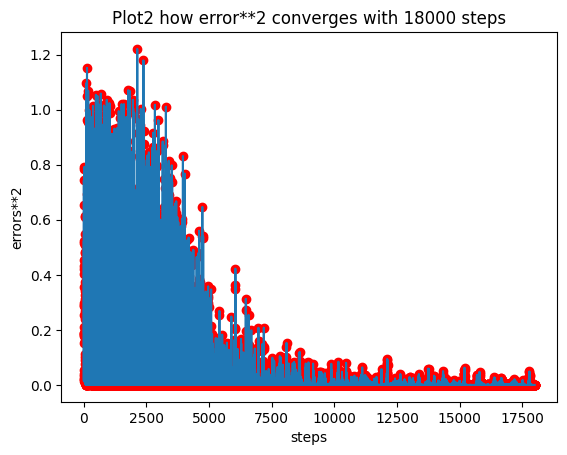

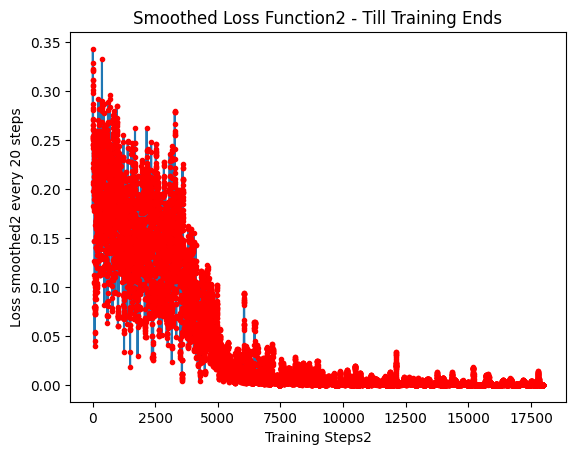

In [10]:
super_X = np.array([[0, 0],[0, 1], [0.5, 1],[0, 0.5],[1, 0],[1, 1]])
super_y = np.array([0, 0, 0, 1, 1, 1])

super_w, super_steps, super_error_list = NeuralNetwork([2,2,2,1]).fit(X = super_X, y = super_y, steps = 20001) 

# steps = 20000+1, just to make it looks pretty...otherwise i = 19999 when training fails

# error**2error**2error**2error**2error**2error**2error**2error**2error**2error**2error**2error**2error**2error**2error**2error**2
plt.scatter(np.arange(len(super_error_list)), (super_error_list)**2, color = 'red')
plt.plot(np.arange(len(super_error_list)),(super_error_list)**2)
plt.title('Plot2 how error**2 converges with ' + str(len(super_error_list)-1) + ' steps' )
plt.xlim(-len(super_error_list)*0.05,len(super_error_list)*1.05)
plt.ylabel('errors**2')
plt.xlabel('steps')
plt.show()

# losslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslosslossloss
loss2 = super_error_list ** 2
window_size = 20
loss_smooth2 = np.convolve(loss2, np.ones((window_size,))/window_size, mode='same')
plt.figure()
plt.plot(loss_smooth2)
plt.plot(loss_smooth2, 'r.')
plt.ylabel('Loss smoothed2 every {:d} steps'.format(window_size))
plt.xlabel('Training Steps2')
plt.title('Smoothed Loss Function2 - Till Training Ends')
plt.show()

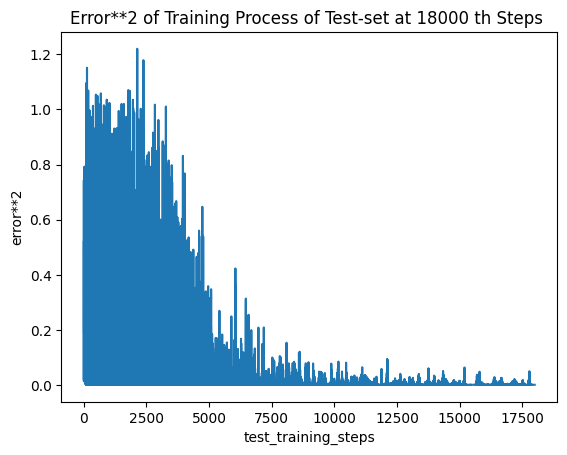

<Figure size 640x480 with 0 Axes>

In [11]:
%matplotlib inline
import time
from IPython import display
from matplotlib import legend

N = 10
x_axis = np.arange(0,len(super_error_list))

for k in range(1, N+1):
    plt.title("Error**2 of Training Process of Test-set at {:d} th Steps ".format(k*len(super_error_list)//N-1))
    plt.xlim(-len(super_error_list)*0.05,len(super_error_list)*1.05)
    plt.xlabel('test_training_steps')
    plt.ylabel('error**2')

    plt.plot(x_axis[:k*(super_steps//N)], super_error_list[:k*(super_steps//N)]**2) # make the plot
    display.clear_output(wait=True) 
    display.display(plt.gcf()) # it shows whatever plt.plot()
    time.sleep(0.8) # then I wait 
    plt.clf()


## Succeeded once before !!! Here is the screenshot!!!

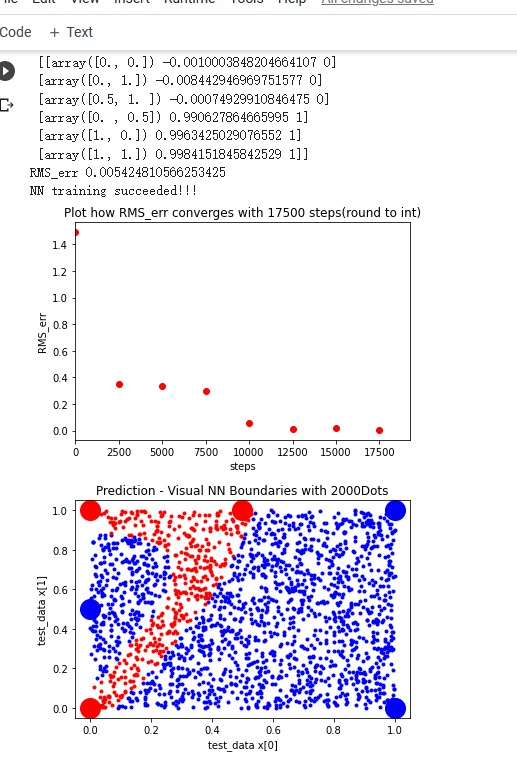

### HERE IS JUST MY PRACTICE

In [ ]:
who = np.array([0,1,2,3])
who[:4]

In [ ]:
layers = [2,3,2,1]
V =  np.array([[0, 0],
               [0, 1], 
               [0.5, 1],
               [0, 0.5],
               [1, 0],
               [1, 1]]) 

Vy = np.array([0, 0, 0, 1, 1, 1])
print(Vy[0])
training_data = [0]*(len(V))
for i in range(len(V)):
    training_data[i] = np.append(V[i], Vy[i])
# print(training_data)
    
for i in range(5):
    choice_data = choice(training_data)
    print(choice_data)
    x_train = np.append(choice_data[0:-1],1) # a0
    y = choice_data[-1]
#     print('choice',x_train, 'y',y)
# R = []   
# R.append(V)
# R.append(Vy)
# R

In [ ]:
w = {}
for i in range(2,len(layers)-1):
    w[i] = np.random.randn(layers[i], layers[i-1]+1) 
print('w2',list(w.values())[0])


In [ ]:
y=6
t=[5,4,3,2]
errors = []
for i in range(len(z)):
    z = y - t[i]
    errors = np.append(errors, z)
print(errors)

In [ ]:
for i in range(5,-1,-1):
    print(i)

In [ ]:
u = [2,1,4,5,6,7]
for i in range(6):
    if u[i] >= 5:
        print("ok")
    else:
        print('no')      

In [ ]:
deltaa = []   
h = 100  # 555
for i in range(2,-1,-1): #2,1,0
    h= h+1
    deltaa.append(h)
    

deltaa.reverse()
deltaa

pp=[]
pp.append(2)
pp
a = np.array([ 0.11238035, -0.52394548, -0.2890739 ])
d = np.array([1,0,1])
np.dot(np.atleast_2d(d).T, np.atleast_2d(a))


In [ ]:
d_lay = np.array([3,4,5])
d_lay = d_lay[::-1]
d_lay

In [ ]:
t = [0]*5
u = []
for i in range(5):
    t[i] = u  + 1 
    t = u
    print(u)

In [ ]:
j = np.arange(0,12)
j

In [ ]:
for i in range (50+1):
    if i%5 == 0:
        print(f"The i-th character is:", [i])

In [ ]:
A1 =np.array([ 0.82255409,  0.50005746, -0.99980504, -0.91732344,  1.        ])
D1 =np.array([0.01622401, 0.10865544])
print(np.dot(np.atleast_2d(D1).T,np.atleast_2d(A1)))

In [ ]:
for i in range(0,1):
  i+1
  print(i)

In [ ]:
nn = np.array([0,1,2,3,4,5])
for i in range(5):
  if (i%2) == 0:
    q =i+nn[i]
    print('-------en',q)


In [ ]:
uu = np.array([1,2,3,4])
c = 1
for i in range(len(uu)):
  c = c * uu[i]
  print(c)

In [ ]:
a,b = NeuralNetwork([2,2,1], activation = sigmoid).fit(X,y,steps = 10)
print(a)# a = self.wfor j in range(len(X)):
for j in range(len(X)):
 for t in a:
    xj = X[j]
    xj = sigmoid(np.dot(np.atleast_2d(np.append(xj,1)), t.T))
 print(xj)

In [ ]:
rrrr = []
row = np.array([0,1,2])
for rr in row:
    rrr = rr**2
    rrrr.append(rrr)
    
print(np.sum(rrrr))

In [ ]:
UU = []
for uu in range(5):
    if (uu%2) == 0:
        uu = uu+1
        UU.append(uu)
print(UU)

In [ ]:
rrrr = [1,2,3]
print(np.asarray(rrrr)**2)

In [ ]:
vvv = np.random.rand(5,2)


In [ ]:
print(X)
ppp = [1,2]
mom = []
for f, uuuu in enumerate(X):
  for ff, pppp in enumerate(ppp):
    f = f - pppp
    mom.append(f)
print(mom)


In [ ]:
'{:.1f},{:.1f}'.format(-1, 5)